<a href="https://colab.research.google.com/github/neklyud/simple_utils/blob/master/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import cv2

In [0]:
img = cv2.cv2.imread('000002.bmp',)
img_rgb = cv2.cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
img_rgb = cv2.filter2D(img_rgb,-1,kernel)

In [0]:
edges = cv2.Canny(img_rgb,200,450)
print(img_rgb.shape)

(645, 727, 3)


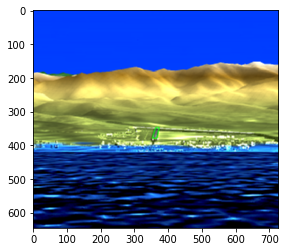

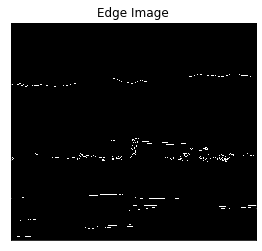

In [0]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb,cmap = 'gray')
plt.show()
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
minLineLength = 1
maxLineGap = 50
lines = cv2.HoughLinesP(edges, 5, theta = np.pi/2, threshold = 10, minLineLength = minLineLength,maxLineGap = maxLineGap)

In [0]:
zeross = np.zeros(img.shape)

In [0]:
for line in lines:
  for x1,y1,x2,y2 in line:
      cv2.line(zeross,(x1,y1),(x2,y2),(0,255,0),2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


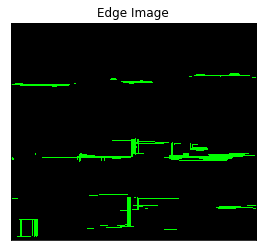

In [0]:
plt.imshow(zeross,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
lines.shape

(169, 1, 4)

In [0]:
rec = cv2.rectangle()

TypeError: ignored

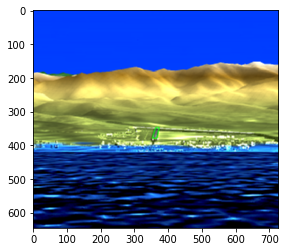

In [0]:
plt.imshow(img_rgb)
plt.show()

#SHAPE DETECTOR

In [0]:
class ShapeDetector:
  def __init__(self):
    pass
  def detect(self,c):
    c = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
    shape = 'rectangle'
    perimetr = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
		# compute the bounding box of the contour and use the
		# bounding box to compute the aspect ratio
    (x, y, w, h) = cv2.boundingRect(approx)
    ar = w / float(h)
    # a square will have an aspect ratio that is approximately
    # equal to one, otherwise, the shape is a rectangle
    shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    print(x, y, w, h)

In [0]:
det = ShapeDetector()

In [0]:
thresh = cv2.threshold(img_rgb, 200, 255, cv2.THRESH_BINARY)[0]